In [291]:
%pylab inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.font_manager import FontProperties

from ast import literal_eval

import collections

Populating the interactive namespace from numpy and matplotlib


/home/cmb-panasas2/wenzhenl/downloads/miniconda/envs/ribo/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
mycolors = [
    '#e41a1c',
    '#377eb8',
    '#4daf4a',
    '#984ea3',
    '#d3d3d3']
#     '#ff7f00',
#     '#ffff33',
#     '#a65628',
#     '#f781bf',
#     '#999999']

In [251]:
# ribotaper_cutoff = args[1]
ribotaper_cutoff = 0.05
# default 6.044
# ORFscore_cutoff = args[2]
ORFscore_cutoff = 6.044
# default 0.05
# ribocode_cutoff = args[3]
ribocode_cutoff = 0.05
#default 0.428571428571
# ribocop_cutoff = as.double(args[1])
ribocop_cutoff = 0.428571428571

In [273]:
datasets = pd.read_table('/home/cmb-panasas2/wenzhenl/benchmark/scripts/gene_scripts/datasets.txt', header=None, sep=' ')

In [277]:
for idx, row in datasets.iterrows():
    print(row[0], row[1])

('SRP010679_human', 'hg38')
('SRP029589_human', 'hg38')
('SRP063852_human', 'hg38')
('SRP098789_human', 'hg38')
('SRP102021_human', 'hg38')
('SRP003554_mouse', 'mm10')
('SRP062407_mouse', 'mm10')
('SRP078005_mouse', 'mm10')
('SRP091889_mouse', 'mm10')
('SRP115915_mouse', 'mm10')


('hg38', 'SRP010679_human')
length.x
reads_ribo
ribo_cov
('hg38', 'SRP029589_human')
length.x
reads_ribo
ribo_cov
('hg38', 'SRP063852_human')
length.x
reads_ribo
ribo_cov
('hg38', 'SRP098789_human')
length.x
reads_ribo
ribo_cov
('hg38', 'SRP102021_human')
length.x
reads_ribo
ribo_cov
('mm10', 'SRP003554_mouse')
length.x
reads_ribo
ribo_cov
('mm10', 'SRP062407_mouse')
length.x
reads_ribo
ribo_cov
('mm10', 'SRP078005_mouse')
length.x
reads_ribo
ribo_cov
('mm10', 'SRP091889_mouse')
length.x
reads_ribo
ribo_cov
('mm10', 'SRP115915_mouse')
length.x
reads_ribo
ribo_cov


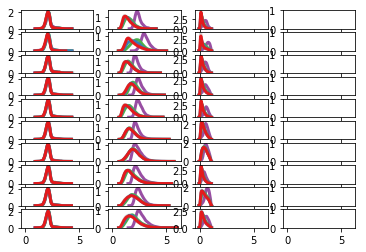

In [290]:
totest = 'Ribocov_aver'
# totest = 'length.x'
# totest = 'reads_ribo'
# totest = 'pct_region_covered_ribo'
fig, axes = plt.subplots(10, 4, sharex=True)
attributes = ['length.x', 'reads_ribo', 'ribo_cov']
attlabels = ['log10(length)', 'log10(counts)', 'coverage', 'percentage of region covered']
attlabels = dict(zip(attributes, attlabels))
uselogs = [True, True, False, False]
uselogs = dict(zip(attributes, uselogs))
nrow=ncol=-1
for idx, row in datasets.iterrows():
    nrow += 1
    ref = row[1]
    pro = row[0]
    print(ref, pro)
    roc = '/home/cmb-panasas2/wenzhenl/benchmark/exon_level/{}/{}/ROC_input.txt'.format(ref, pro)
    ribotaper = '/home/cmb-panasas2/wenzhenl/benchmark/exon_level/{}/{}/results_ccds'.format(ref, pro)
    ribocode = '/home/cmb-panasas2/wenzhenl/benchmark/exon_level/{}/{}/ribocode_result.txt'.format(ref, pro)
    code_df = pd.read_table(ribocode, header=0, index_col=0)
    taper_df = pd.read_table(ribotaper, header=0, index_col=0)
    roc_df = pd.read_table(roc, header=0, index_col=0)
    for totest in attributes:
        print(totest)
        ncol = (ncol+1) % 3
        attlabel = attlabels[totest]
        uselog = uselogs[totest]
        background = collections.Counter()
        ribotaper = collections.Counter()
        orfscore = collections.Counter()
        ribocode = collections.Counter()
        ribocop = collections.Counter()
        for ix, row in roc_df.iterrows():
            if ix.endswith('_ribo') and totest == 'ribo_cov':
                background[code_df.loc[ix[:ix.rfind('_')], totest]] += 1
                if row['ribotaper'] < ribotaper_cutoff:
                    ribotaper[code_df.loc[ix[:ix.rfind('_')], totest]] += 1
                if row['ORFscore'] > ORFscore_cutoff:
                    orfscore[code_df.loc[ix[:ix.rfind('_')], totest]] += 1
                if row['ribocode'] < ribocode_cutoff:
                    ribocode[code_df.loc[ix[:ix.rfind('_')], totest]] += 1
                if row['ribocop'] > ribocop_cutoff:
                    ribocop[code_df.loc[ix[:ix.rfind('_')], totest]] += 1
            elif ix.endswith('_ribo'):
                background[taper_df.loc[ix[:ix.rfind('_')], totest]] += 1
                if row['ribotaper'] < ribotaper_cutoff:
                    ribotaper[taper_df.loc[ix[:ix.rfind('_')], totest]] += 1
                if row['ORFscore'] > ORFscore_cutoff:
                    orfscore[taper_df.loc[ix[:ix.rfind('_')], totest]] += 1
                if row['ribocode'] < ribocode_cutoff:
                    ribocode[taper_df.loc[ix[:ix.rfind('_')], totest]] += 1
                if row['ribocop'] > ribocop_cutoff:
                    ribocop[taper_df.loc[ix[:ix.rfind('_')], totest]] += 1
        labels = ['Background', 'ORFscore', 'RiboTaper', 'RiboCode', 'RiboCop']
        for i, data in enumerate([background, orfscore, ribotaper, ribocode, ribocop]):
            to_plot = []
            for k, v in data.items():
                to_plot += [k] * v
            if uselog:
                to_plot = np.log10(to_plot)
            sns.distplot(to_plot, color=mycolors[4-i], kde=True, hist=False,
                        kde_kws = {'shade': False, 'linewidth': 3}, ax=axes[nrow][ncol])
#     if nrow > 0:
#         break
#fig.set_size_inches(9, 4.95)
plt.savefig('{}/all_dist.pdf'.format('results'))

In [267]:
background = collections.Counter()
ribotaper = collections.Counter()
orfscore = collections.Counter()
ribocode = collections.Counter()
ribocop = collections.Counter()
for ix, row in roc_df.iterrows():
    if ix.endswith('_ribo'):
        background[code_df.loc[ix[:ix.rfind('_')], totest]] += 1
        if row['ribotaper'] < ribotaper_cutoff:
            ribotaper[code_df.loc[ix[:ix.rfind('_')], totest]] += 1
        if row['ORFscore'] > ORFscore_cutoff:
            orfscore[code_df.loc[ix[:ix.rfind('_')], totest]] += 1
        if row['ribocode'] < ribocode_cutoff:
            ribocode[code_df.loc[ix[:ix.rfind('_')], totest]] += 1
        if row['ribocop'] > ribocop_cutoff:
            ribocop[code_df.loc[ix[:ix.rfind('_')], totest]] += 1

In [261]:
# totest = 'P_sites_sum'
totest = 'Ribocov_aver'
# totest = 'length.x'
# totest = 'reads_ribo'
# totest = 'pct_region_covered_ribo'
background = collections.Counter()
ribotaper = collections.Counter()
orfscore = collections.Counter()
ribocode = collections.Counter()
ribocop = collections.Counter()
for ix, row in roc_df.iterrows():
    if ix.endswith('_ribo'):
        background[taper_df.loc[ix[:ix.rfind('_')], totest]] += 1
        if row['ribotaper'] < ribotaper_cutoff:
            ribotaper[taper_df.loc[ix[:ix.rfind('_')], totest]] += 1
        if row['ORFscore'] > ORFscore_cutoff:
            orfscore[taper_df.loc[ix[:ix.rfind('_')], totest]] += 1
        if row['ribocode'] < ribocode_cutoff:
            ribocode[taper_df.loc[ix[:ix.rfind('_')], totest]] += 1
        if row['ribocop'] > ribocop_cutoff:
            ribocop[taper_df.loc[ix[:ix.rfind('_')], totest]] += 1
fig, ax = plt.subplots(figsize=(12,8))
uselog = False
labels = ['Background', 'ORFscore', 'RiboTaper', 'RiboCode', 'RiboCop']
for i, data in enumerate([background, orfscore, ribotaper, ribocode, ribocop]):
    to_plot = []
    for k, v in data.items():
        to_plot += [k] * v
    if uselog:
        to_plot = np.log10(to_plot)
    sns.distplot(to_plot, color=mycolors[4-i], kde=True, hist=False,
                kde_kws = {'shade': False, 'linewidth': 3}, label = labels[i])
plt.xlabel(totest)
plt.ylabel('Density')
plt.savefig('{}/{}_{}_dist.pdf'.format('results', pro, totest))

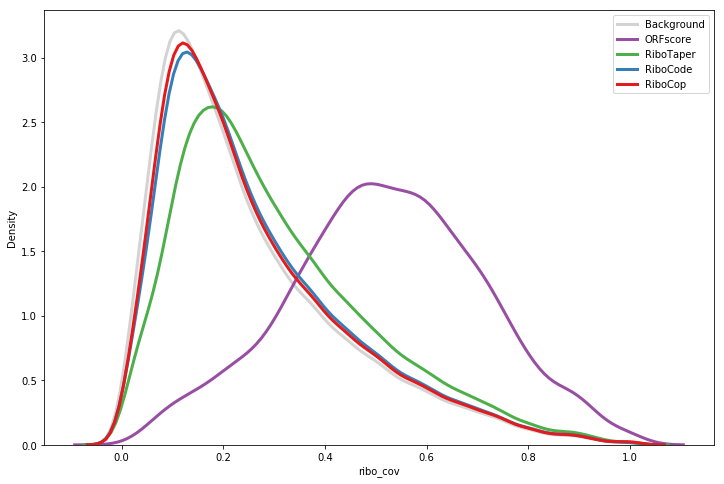

In [268]:
fig, ax = plt.subplots(figsize=(12,8))
uselog = False
labels = ['Background', 'ORFscore', 'RiboTaper', 'RiboCode', 'RiboCop']
for i, data in enumerate([background, orfscore, ribotaper, ribocode, ribocop]):
    to_plot = []
    for k, v in data.items():
        to_plot += [k] * v
    if uselog:
        to_plot = np.log10(to_plot)
    sns.distplot(to_plot, color=mycolors[4-i], kde=True, hist=False,
                kde_kws = {'shade': False, 'linewidth': 3}, label = labels[i])
plt.xlabel(totest)
plt.ylabel('Density')
plt.savefig('{}/{}_{}_dist.pdf'.format('results', pro, totest))
# pp = PdfPages('{}/{}_{}_dist.pdf'.format('results', pro, totest))
# pp.savefig(fig)
# pp.close()